<a href="https://colab.research.google.com/github/srilalithaveerubhotla/CMPE_258/blob/master/Ungraded_assignment_1_Keras_colab_redone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [0]:
cifar = keras.datasets.cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
train_labels=np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


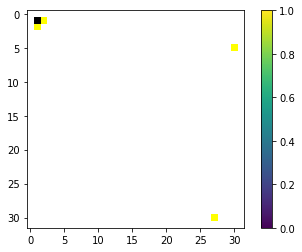

In [6]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

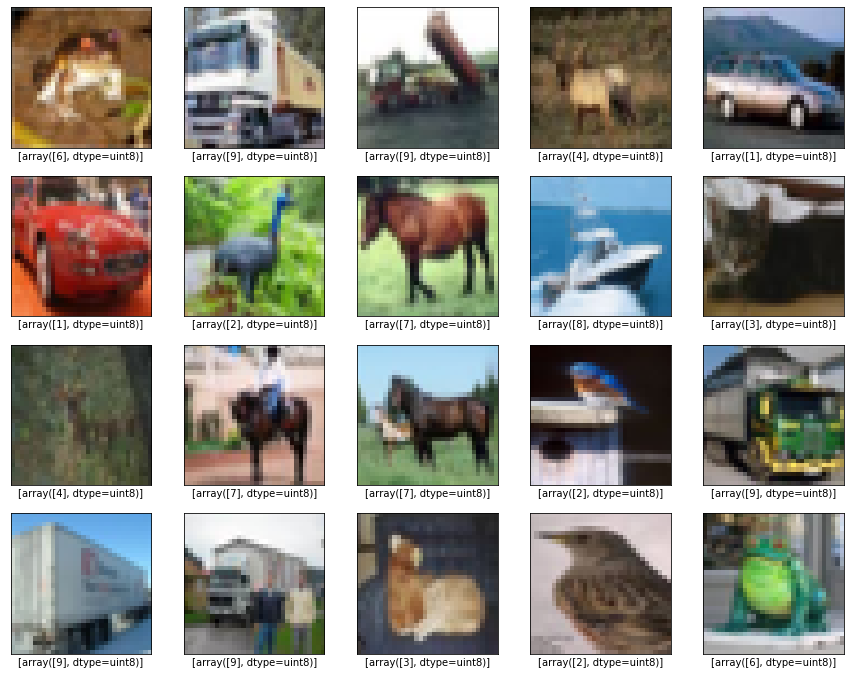

In [8]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel([y_train[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(100,activation='relu')
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.fit(X_train,y_train, epochs=25)

Train on 50000 samples
Epoch 1/25
50000/50000 [==============================] - 26s 518us/sample - loss: 2.8396 - acc: 0.2891
Epoch 2/25
50000/50000 [==============================] - 25s 508us/sample - loss: 2.5207 - acc: 0.3502
Epoch 3/25
50000/50000 [==============================] - 26s 521us/sample - loss: 2.2001 - acc: 0.3775
Epoch 4/25
50000/50000 [==============================] - 27s 541us/sample - loss: 1.6247 - acc: 0.4213
Epoch 5/25
50000/50000 [==============================] - 26s 522us/sample - loss: 1.5817 - acc: 0.4400
Epoch 6/25
50000/50000 [==============================] - 26s 510us/sample - loss: 1.5480 - acc: 0.4515
Epoch 7/25
50000/50000 [==============================] - 26s 521us/sample - loss: 1.5197 - acc: 0.4573
Epoch 8/25
50000/50000 [==============================] - 26s 515us/sample - loss: 1.5001 - acc: 0.4655
Epoch 9/25
50000/50000 [==============================] - 26s 520us/sample - loss: 1.4861 - acc: 0.4724
Epoch 10/25
50000/50000 [================

In [27]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 2s - loss: 1.4750 - acc: 0.4830

Test accuracy: 0.483
